In [1]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 


import plotly.express as px
import plotly.graph_objects as go
import matplotlib.colors as mcolors

In [2]:
#%#%#%#%#%#%#%# Función para renombrar las columnas #%#%#%#%#%#%#%#
def Rename_SAT(Data, Pre, Letra):
    '''
    Función para renombrar las columnas de un DataFrame con un formato específico.
    Input:
    - Data: DataFrame que contiene las columnas a renombrar.
    - Pre: Prefijo que se agregará al nuevo nombre de las columnas.
    - Letra: Formato de las columnas que permite ajustar los índices numéricos.
    Output:
    - Dict: Diccionario que mapea los nombres originales de las columnas a los nuevos nombres.
    - Data: DataFrame con las columnas renombradas.
    '''
    #> Generar nuevos nombres de columnas usando el prefijo y el formato especificado
    Name = ['{}{}'.format(Pre, Letra.format(i+1)) for i in range(len(Data.columns))]
    #> Crear un diccionario que asocia los nombres originales con los nuevos nombres
    Dict = dict(zip(Data.columns, Name))
    #> Cambiar los nombres de las columnas en el DataFrame usando el diccionario creado
    Data = Data.rename(columns=Dict)
    #> Devolver el diccionario y el DataFrame con los nuevos nombres
    return (Dict, Data)

In [3]:
### Entradas

Base = 'D:/Users/LAAR8976/Desktop/CECTI/ENCUESTAS_2025/CLAUDIA/BASE DE DATOS/'

In [4]:
### DESCONCENTRADA

Sistemas = pd.read_excel(Base + 'Mexico_2.xlsx', sheet_name = 'B1' )
Sistemas.head(2)

,RFC Corto,Nombre,Ambito,General,Desconcentrada,UA,Antigüedad,Nivel,Aplicativo,Uso,Eficiencia,Frecuencia,Deficiencia,Reportes,Impacto,Tiempo_Impacto,Herramienta_Ad,Tiempo_Res,Mejoras,APP_NAME
0,MEAA946L,ANTONIO GIOVANNY MEDINA AVALOS,Desconcentrada,AGSC,ADMINISTRACIÓN DESCONCENTRADA DE SERVICIOS AL ...,AGSC,0 a 5 años,Jefe de Departamento,MODELO DE ADMINISTRACION TRIBUTARIA,Consulta de información,Eficiente,Diariamente,Lentitud general,Sin respuesta,Alto,Sin respuesta,NaN,Sí,MAS ÁGIL,MAT
1,MEAA946L,ANTONIO GIOVANNY MEDINA AVALOS,Desconcentrada,AGSC,ADMINISTRACIÓN DESCONCENTRADA DE SERVICIOS AL ...,AGSC,0 a 5 años,Jefe de Departamento,VISOR DOCUMENTAL E.FIRMA,Consulta de información,Eficiente,Diariamente,Lentitud general,Sin respuesta,Alto,Sin respuesta,NaN,Sí,MAS ÁGIL,VISOR DE E.FIRMA


In [5]:
DES_DIC, DES_NEW = Rename_SAT(Sistemas, 'D', '{}')

In [6]:
### Total de Servidores Públicos encuestados

DES_NEW.D1.nunique()

71

In [7]:
### Total de Servidores Públicos encuestados por antigüedad

DES_NEW.groupby(['D8', 'D7'])['D1'].nunique().reset_index().sort_values(by = ['D8'], ascending=True)

,D8,D7,D1
0,Enlace,0 a 5 años,17
1,Enlace,11 a 15 años,1
2,Enlace,16 a 20 años,2
3,Enlace,6 a 10 años,2
4,Enlace,Más de 30 años,1
5,Jefe de Departamento,0 a 5 años,2
6,Jefe de Departamento,11 a 15 años,1
7,Jefe de Departamento,16 a 20 años,1
8,Jefe de Departamento,6 a 10 años,1
13,Operativo,6 a 10 años,5


In [8]:
### D9 == Sistemas distintos
### D20 == Sistemas alineados

DES_NEW.groupby(['D3']).agg({'D9': 'nunique', 'D20': 'nunique'}).reset_index()

,D3,D9,D20
0,Desconcentrada,254,81


In [221]:
### Top de los sistemas más usados 
### D20 == Sistemas alineados
### D1 == Usuarios

Fig_1 = DES_NEW.groupby(['D20']).agg({'D1': 'nunique'}).reset_index().sort_values(by = ['D1'], ascending = False).head(15)
Fig_1.head(2)

,D20,D1
43,MAT,64
12,CERTISAT,61


In [230]:
def Grafico_Radial(df, categoria, valor, width=1200, height=1200):
    """
    Crea un gráfico de barras circulares atractivo en Plotly sin líneas de fondo visibles,
    etiquetas organizadas y valores entre corchetes al lado del nombre.
    
    Parámetros:
    df (pd.DataFrame): Tabla de datos.
    categoria (str): Nombre de la columna con las etiquetas.
    valor (str): Nombre de la columna con los valores numéricos.
    width (int): Ancho del gráfico en píxeles.
    height (int): Altura del gráfico en píxeles.
    
    Retorna:
    fig (plotly.graph_objects.Figure): Gráfico circular de barras generado.
    """
    # Normalizar los valores para mejorar la visualización en la escala radial
    max_val = df[valor].max()
    df['normalized'] = df[valor] / max_val * 100  # Escalamos los valores a 100%

    # Generar los ángulos en el eje circular
    theta_angles = np.linspace(0, 360, len(df), endpoint=False)

    # Crear una escala de colores con `LinearSegmentedColormap`
    cmap = mcolors.LinearSegmentedColormap.from_list("", ['#630d32', '#b18f5f', '#6f6f71'])
    num_items = len(df)

    # Asignar colores a las barras en función de la cantidad de categorías
    colors = [mcolors.to_hex(cmap(i / (num_items - 1))) for i in range(num_items)] if num_items > 1 else [mcolors.to_hex(cmap(0))]

    # Contar cuántos valores están repetidos para ajustar su posición
    count_dict = df[valor].value_counts().to_dict()
    offset_dict = {key: 0 for key in count_dict}  # Para rastrear el desplazamiento de cada valor repetido

    # Crear el gráfico de barras circulares
    fig = go.Figure()

    for i, row in enumerate(df.itertuples(index=False)):
        fig.add_trace(go.Barpolar(
            r = [row.normalized],  # Normalizado para escala
            theta = [theta_angles[i]],  # Ángulo en coordenadas polares
            width = [20],  # Ancho de la barra radial
            marker_color = colors[i],  # Asignar colores de la nueva escala
            name = row.__getattribute__(categoria),  # Nombre de la serie
            hoverinfo = "text"
        ))

    # Agregar etiquetas con líneas punteadas y valores entre corchetes
    etiquetas = []
    for i, row in enumerate(df.itertuples(index=False)):
        value = row.__getattribute__(valor)

        # Aumentamos la distancia de la etiqueta si hay varios valores iguales
        extra_offset = offset_dict[value] * 5  # Separación progresiva para evitar amontonamiento
        etiquetas.append(f"{row.__getattribute__(categoria)} [{value}]")  # Valor entre corchetes

        etiqueta_r = row.normalized + 10 + extra_offset  # Ajuste dinámico
        etiqueta_theta = theta_angles[i]

        # Agregar línea de conexión punteada
        fig.add_trace(go.Scatterpolar(
            r = [row.normalized, etiqueta_r],  # Línea desde la barra hasta la etiqueta
            theta = [etiqueta_theta, etiqueta_theta],
            mode = "lines",
            line = dict(color = "#EEE56E", width = 1.2, dash = "dot"),  # Línea punteada negra
            showlegend = False
        ))

        # Agregar la etiqueta en la posición final de la línea
        fig.add_trace(go.Scatterpolar(
            r = [etiqueta_r],  # Ajuste de posición
            theta = [etiqueta_theta],
            text = [etiquetas[i]],  # Etiqueta con nombre y valor al lado en corchetes
            mode = "text",
            textposition = "middle center",
            textfont = dict(size = 12, color = "black")  # Color y tamaño de la fuente
        ))

        # Actualizar el desplazamiento para la siguiente etiqueta si el valor es repetido
        offset_dict[value] += 1

    # Configurar diseño para OCULTAR TODAS LAS LÍNEAS Y CÍRCULOS
    fig.update_layout(
        width = width,  # Tamaño personalizado
        height = height,
        polar = dict(
            bgcolor = "white",  # Fondo blanco sin líneas
            radialaxis = dict(
                visible = False,  # Oculta completamente los anillos radiales
                showline = False,
                showticklabels = False,
                ticks = "",
                gridcolor = "rgba(0,0,0,0)",  # Asegura que no haya líneas de cuadrícula
                layer = "below traces"  # Se asegura de que no interfiera con las barras
            ),
            angularaxis = dict(direction = "counterclockwise",
                visible = False,  # Oculta completamente los valores angulares
                showticklabels = False,
                showline = False,
                tickvals = [],  # Elimina valores
                ticktext = [],  # No muestra texto en el eje
                ticks = "",
                gridcolor = "rgba(0,0,0,0)"  # Asegura que no haya líneas de cuadrícula
            )
        ),
        showlegend = False,
        margin = dict(l = 30, r = 30, t = 50, b = 50),
        template = "plotly_white"
    )

    return (fig)


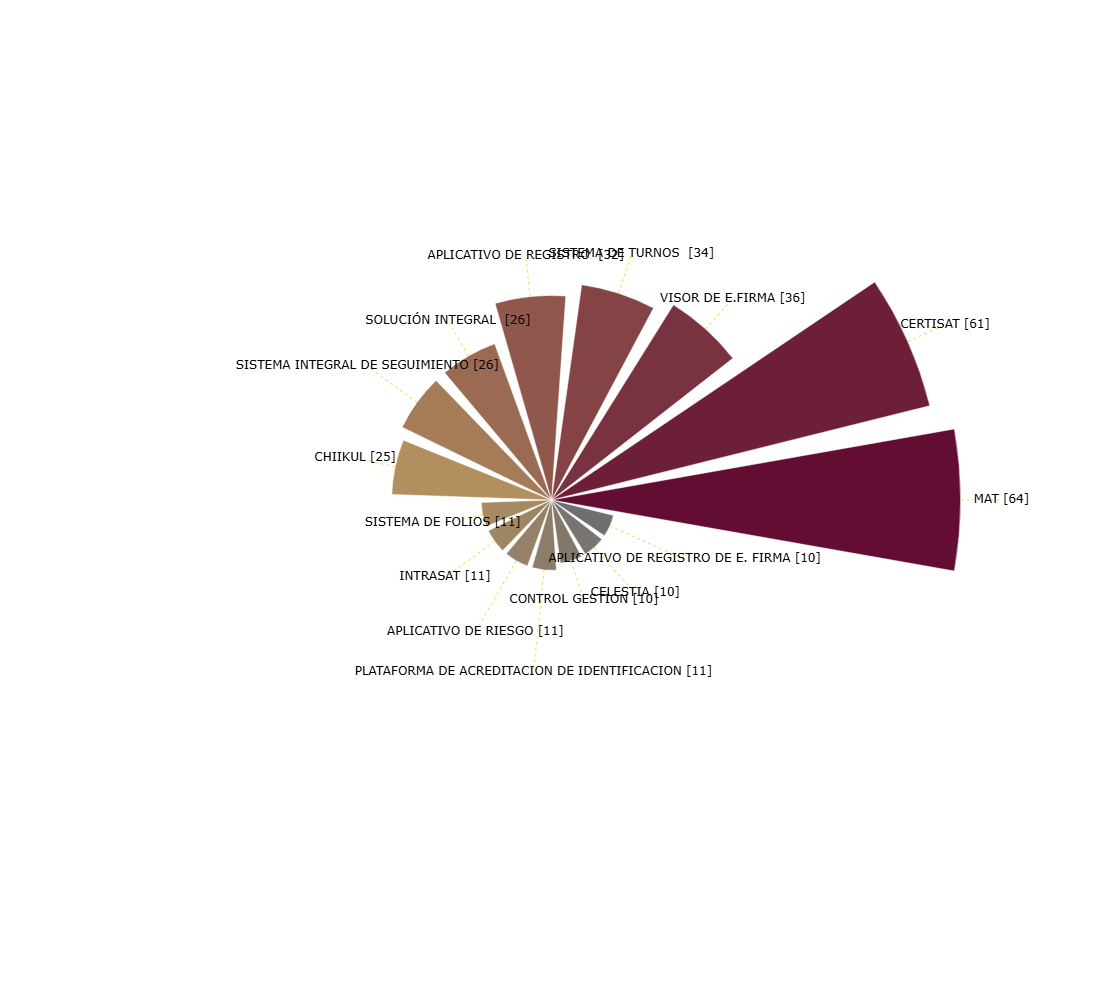

In [231]:
Grafico_Radial(Fig_1, 'D20', 'D1', width=1000, height=1000)

In [10]:
### Eficacia de los sistemas
### D1 == Usuarios
### D20 == Sistemas alineados

DES_NEW.groupby(['D11']).agg({'D1': 'nunique', 'D20': 'nunique'}).reset_index().sort_values(by = ['D20'], ascending = False)

,D11,D1,D20
2,Funcional,60,56
1,Eficiente,43,54
0,Deficiente,38,26
3,Sin respuesta,1,1


In [224]:
### Sistemas más deficientes 

Fig_2 = DES_NEW[DES_NEW['D11'] == 'Deficiente'].groupby(['D11','D20']).agg({'D1': 'nunique'})\
        .reset_index().sort_values(by = ['D1'], ascending = False).head(10)


In [225]:
def Grafico_Pastel(Tabla, X_C, Y_C, width=600, height=600):
    """
    Crea un gráfico de pastel personalizado con una escala de colores específica y tamaño ajustable.
    
    Parámetros:
    Tabla (pd.DataFrame): Tabla de datos.
    X_C (str): Nombre de la columna para las etiquetas.
    Y_C (str): Nombre de la columna con los valores numéricos.
    width (int): Ancho del gráfico en píxeles.
    height (int): Altura del gráfico en píxeles.
    
    Retorna:
    fig (plotly.graph_objects.Figure): Gráfico de pastel generado.
    """
    # Definir la escala de colores
    cmap = mcolors.LinearSegmentedColormap.from_list("", ['#630d32', '#b18f5f', '#6f6f71'])
    num_items = len(Tabla)

    # Generar colores en función de la cantidad de categorías
    colors = [mcolors.to_hex(cmap(i / (num_items - 1))) for i in range(num_items)] if num_items > 1 else [mcolors.to_hex(cmap(0))]

    # Calcular valores de separación (pull) en función del máximo
    max_value = Tabla[Y_C].max()
    pull_values = [0.05 if val > 0.80 * max_value else 0 for val in Tabla[Y_C]]

    # Crear la gráfica de pastel
    fig = px.pie(Tabla, names=X_C, values=Y_C)

    # Configurar el estilo de la gráfica
    fig.update_traces(
        pull=pull_values,
        marker=dict(
            colors=colors,
            line=dict(color='#FFFFFF', width=0.5)
        ),
        textposition='outside',
        textinfo='label+percent',
        insidetextorientation='radial',
        hovertemplate=None,
        hoverinfo='none'
    )

    fig.update_traces(
        pull=pull_values,
        marker=dict(colors=colors),
        hole=0
    )

    # Configurar el diseño de la gráfica con `width` y `height`
    fig.update_layout(
        width=width,  # Ancho del gráfico
        height=height,  # Altura del gráfico
        title_font_size=10,
        title={'text': "", 'x': 0.5, 'xanchor': 'center', 'font': {'family': "Noto Sans", 'size': 11}},
        font=dict(family="Noto Sans", size=12, color='#000000'),
        template=None, 
        showlegend=False,
        margin={"r": 0, "t": 50, "l": 0, "b": 50},
        uniformtext=dict(minsize=5, mode='hide')
    )

    return (fig)

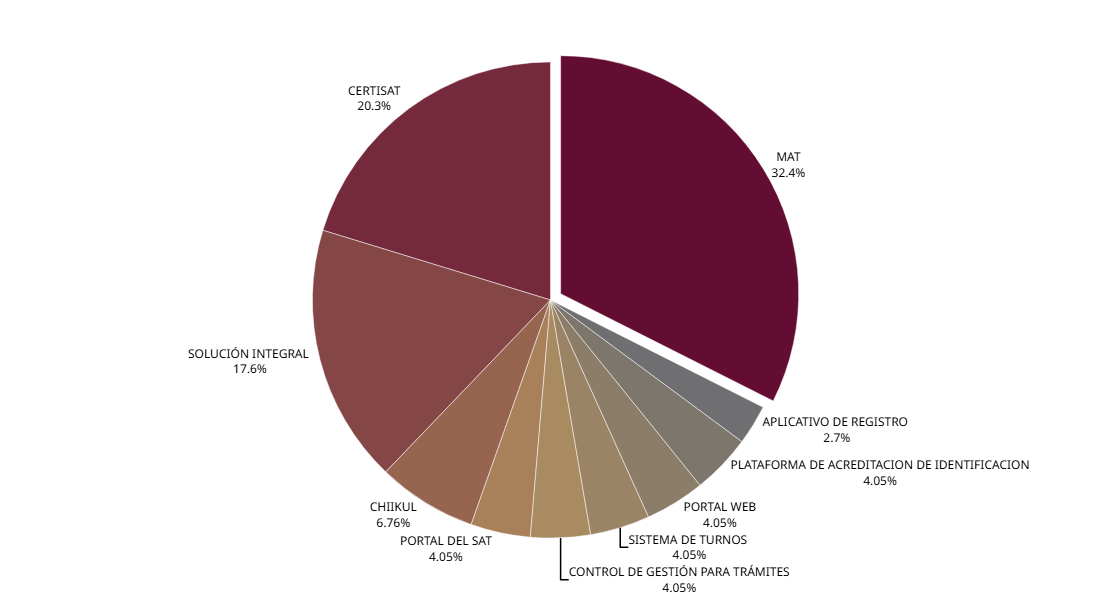

In [226]:
Grafico_Pastel(Fig_2, 'D20', 'D1', width=1000, height=600)

In [243]:
### Sistemas de uso diario mas deficientes, top 10

DES_NEW[(DES_NEW['D12'] == 'Diariamente') & (DES_NEW['D11'] == 'Deficiente')]\
       .groupby(['D12', 'D11','D20']).agg({'D1': 'nunique'}).reset_index()\
       .sort_values(by = ['D1'], ascending = False).head(10)


,D12,D11,D20,D1
11,Diariamente,Deficiente,MAT,23
4,Diariamente,Deficiente,CERTISAT,15
20,Diariamente,Deficiente,SOLUCIÓN INTEGRAL,8
5,Diariamente,Deficiente,CHIIKUL,5
12,Diariamente,Deficiente,PLATAFORMA DE ACREDITACION DE IDENTIFICACION,3
17,Diariamente,Deficiente,SISTEMA DE TURNOS,3
6,Diariamente,Deficiente,CONTROL DE GESTIÓN PARA TRÁMITES,3
15,Diariamente,Deficiente,PORTAL WEB,3
14,Diariamente,Deficiente,PORTAL DEL SAT,3
16,Diariamente,Deficiente,SIAT-MAT,2


In [244]:
### Total de reporte por sistemas (Grafica)
### D1 == Usuarios
### D20 == Sistemas alineados

DES_NEW.groupby(['D14']).agg({'D1': 'nunique', 'D20': 'nunique'}).reset_index().sort_values(by = ['D1'], ascending = False)

,D14,D1,D20
1,1 a 5 reportes,49,38
0,0 reportes,46,69
5,Sin respuesta,14,25
4,6 a 10 reportes,11,5
3,16 o más reportes,3,11
2,11 a 15 reportes,2,2


In [245]:
### Total de reportes '1 a 5 reportes' por sistemas y usuarios
### D20 == Sistemas alineados
### D1 == Usuarios

DES_NEW[DES_NEW['D14'] == '1 a 5 reportes'].groupby(['D14','D20']).agg({'D1': 'nunique'}).\
       reset_index().sort_values(by = ['D1'], ascending = False).head(10)

,D14,D20,D1
20,1 a 5 reportes,MAT,35
6,1 a 5 reportes,CERTISAT,30
35,1 a 5 reportes,SOLUCIÓN INTEGRAL,14
37,1 a 5 reportes,VISOR DE E.FIRMA,12
1,1 a 5 reportes,APLICATIVO DE REGISTRO,12
7,1 a 5 reportes,CHIIKUL,12
33,1 a 5 reportes,SISTEMA INTEGRAL DE SEGUIMIENTO,8
32,1 a 5 reportes,SISTEMA DE TURNOS,7
18,1 a 5 reportes,INTRASAT,7
5,1 a 5 reportes,CELESTIA,6


In [246]:
### Total de reportes '6 a 10 reportes' por sistemas y usuarios
### D20 == Sistemas alineados
### D1 == Usuarios

DES_NEW[DES_NEW['D14'] == '6 a 10 reportes'].groupby(['D14','D20']).agg({'D1': 'nunique'}).\
       reset_index().sort_values(by = ['D1'], ascending = False).head(10)

,D14,D20,D1
1,6 a 10 reportes,MAT,8
0,6 a 10 reportes,CERTISAT,6
3,6 a 10 reportes,PORTAL DEL SAT,2
2,6 a 10 reportes,PLATAFORMA DE ACREDITACION DE IDENTIFICACION,1
4,6 a 10 reportes,VALIDACION DE INSTRUMENTOS NOTARIALES,1


In [247]:
### Total de reportes '11 a 15 reportes' por sistemas y usuarios
### D20 == Sistemas alineados
### D1 == Usuarios

DES_NEW[DES_NEW['D14'] == '11 a 15 reportes'].groupby(['D14','D20']).agg({'D1': 'nunique'}).\
       reset_index().sort_values(by = ['D1'], ascending = False).head(10)

,D14,D20,D1
0,11 a 15 reportes,CHIIKUL,1
1,11 a 15 reportes,PLATAFORMA DE ACREDITACION DE IDENTIFICACION,1


In [248]:
### Total de reportes '16 o más reportes' por sistemas y usuarios
### D20 == Sistemas alineados
### D1 == Usuarios

DES_NEW[DES_NEW['D14'] == '16 o más reportes'].groupby(['D14','D20']).agg({'D1': 'nunique'}).\
       reset_index().sort_values(by = ['D1'], ascending = False).head(10)

,D14,D20,D1
6,16 o más reportes,MAT,3
1,16 o más reportes,APLICATIVO DE REGISTRO,2
2,16 o más reportes,CERTISAT,2
8,16 o más reportes,SISTEMA DE TURNOS,2
0,16 o más reportes,ACCESS,1
3,16 o más reportes,CHIIKUL,1
4,16 o más reportes,CONTROL GESTION,1
5,16 o más reportes,INTRASAT,1
7,16 o más reportes,PORTAL DEL SAT,1
9,16 o más reportes,SISTEMA INTEGRAL DE SEGUIMIENTO,1


In [249]:
### Impacto a la falla
DES_NEW.D15.unique()

array(['Alto', 'Medio', 'Bajo', 'Mínimo', 'Minimo ', nan, 'Minimo',
       'Sin respuesta', 'Alto ', 'Medio '], dtype=object)

In [250]:
### Generar código para corrección del texto por errores humanos
DES_NEW['D15'] = DES_NEW['D15'].str.strip().replace('Minimo', 'Mínimo')

In [251]:
### Tabla para generar el grafico 4 == Sistemas e impacto

DES_NEW[(DES_NEW['D15'] == 'Alto') | (DES_NEW['D15'] == 'Medio')].groupby(['D15','D20']).\
     agg({'D1': 'nunique'}).reset_index().pivot_table(index = 'D20', columns = 'D15',
                                                      values = 'D1', aggfunc = 'sum', fill_value = 0).reset_index().\
     sort_values(by = ['Alto', 'Medio'], ascending = [False, False]).head(10)

D15,D20,Alto,Medio
40,MAT,63,1
12,CERTISAT,58,3
75,VISOR DE E.FIRMA,31,4
66,SISTEMA DE TURNOS,30,1
5,APLICATIVO DE REGISTRO,28,2
13,CHIIKUL,18,7
70,SOLUCIÓN INTEGRAL,16,5
67,SISTEMA INTEGRAL DE SEGUIMIENTO,14,7
8,APLICATIVO DE RIESGO,11,0
37,INTRASAT,10,0


In [252]:
### Tiempo de recuperación al impacto

DES_NEW.D16.unique()

array(['Sin respuesta', 'Mismo día en menos de 2 horas',
       'Mismo día más de 2 horas', 'Al día siguiente', 'Mas de 3 días'],
      dtype=object)

In [253]:
### Tiempo de atención a los sistemas

Filtro_D14 = ['1 a 5 reportes', '6 a 10 reportes', '11 a 15 reportes']
Filtro_D15 = ['Alto', 'Medio']
Filtro_D16 = ['Mismo día más de 2 horas', 'Al día siguiente', 'Mas de 3 días']


Tiempo_Sist = ( DES_NEW[DES_NEW['D14'].isin(Filtro_D14) & DES_NEW['D15'].isin(Filtro_D15) & DES_NEW['D16'].isin(Filtro_D16)]
                 .groupby(['D16', 'D20'])['D1'].nunique().reset_index().groupby('D16', group_keys = False)
                 .apply(lambda x: x.nlargest(10, 'D1')) # Ordena y toma los 10 primeros en una sola operación
                )
Tiempo_Sist

,D16,D20,D1
2,Al día siguiente,CHIIKUL,5
6,Al día siguiente,PORTAL DEL SAT,3
1,Al día siguiente,CERTISAT,2
4,Al día siguiente,INTRASAT,2
10,Al día siguiente,SOLUCIÓN INTEGRAL,2
11,Al día siguiente,VISOR DE E.FIRMA,2
0,Al día siguiente,CELESTIA,1
3,Al día siguiente,HECOFIS,1
5,Al día siguiente,MAT,1
7,Al día siguiente,PORTAL WEB,1


In [254]:
DES_NEW.D13.unique()

array(['Lentitud general', 'Soporte y mantenimiento deficiente',
       'Actualizaciones inadecuadas', 'Saturación y Acceso',
       'Sin respuesta', 'Fallas en modulos', 'Tiempo de espera',
       'Interfaz poco intuitiva', 'Funcionalidades limitada',
       'Dificultad para generar reportes', nan], dtype=object)

In [255]:
Filtro_D13 = ['Lentitud general', 'Saturación y Acceso', 'Tiempo de espera', 'Soporte y mantenimiento deficiente']

DES_NEW[DES_NEW['D13'].isin(Filtro_D13)].groupby(['D13', 'D20'])['D1'].\
                       nunique().reset_index().groupby('D13', group_keys = False).\
                       apply(lambda x: x.nlargest(10, 'D1'))

,D13,D20,D1
23,Lentitud general,MAT,36
9,Lentitud general,CERTISAT,23
37,Lentitud general,SOLUCIÓN INTEGRAL,12
10,Lentitud general,CHIIKUL,10
40,Lentitud general,VISOR DE E.FIRMA,8
3,Lentitud general,APLICATIVO DE REGISTRO,7
36,Lentitud general,SISTEMA INTEGRAL DE SEGUIMIENTO,7
13,Lentitud general,CONTROL GESTION,4
18,Lentitud general,DECLARACIONES Y PAGOS (DYP),4
21,Lentitud general,INTRASAT,4


In [256]:
DES_NEW.groupby(['D20','D17']).agg({'D1': 'nunique'}).reset_index().sort_values(by = ['D1'], ascending = False).head(15)

,D20,D17,D1
115,MAT,RU,4
48,CERTISAT,FORMATO DE CONTINGENCIA Y CERTISAT WEB,3
117,MAT,RU/RX Formato de contingencia,3
121,MAT,SOLUCION INTEGRAL,3
185,VISOR DE E.FIRMA,SE VALIDA MAS TARDE,2
126,MAT,"SOLUCIÓN INTEGRAL, FORMATOS ALTERNATIVOS RU",2
35,CERTISAT,Acuses alternativos de Contingencia,2
38,CERTISAT,CERTISAT WEB,2
47,CERTISAT,FORMATO DE CONTINGENCIA,2
52,CERTISAT,FORMATOS DE CONTINGENCIA Y CERTISAT WEB,2


In [257]:
tt = DES_NEW.groupby(['D20'])['D1'].nunique().reset_index().sort_values(by = ['D1'], ascending = False).head(10)
mm = DES_NEW[DES_NEW['D20'].isin(tt.D20.to_list())]

In [258]:
mm.groupby(['D20', 'D17'])['D1'].nunique().reset_index().groupby('D20', group_keys = False).\
                       apply(lambda x: x.nlargest(5, 'D1'))

,D20,D17,D1
7,APLICATIVO DE REGISTRO,FORMATO DE CONTINGENCIA,2
0,APLICATIVO DE REGISTRO,ACUSE ALTERNATIVO PARA QUE EL CERTIFICADO DE E...,1
1,APLICATIVO DE REGISTRO,ALTERNATIVO,1
2,APLICATIVO DE REGISTRO,Acuse alternativo,1
3,APLICATIVO DE REGISTRO,Acuse alternativo de Generacion de Certificado...,1
36,CERTISAT,FORMATO DE CONTINGENCIA Y CERTISAT WEB,3
23,CERTISAT,Acuses alternativos de Contingencia,2
26,CERTISAT,CERTISAT WEB,2
35,CERTISAT,FORMATO DE CONTINGENCIA,2
40,CERTISAT,FORMATOS DE CONTINGENCIA Y CERTISAT WEB,2


In [262]:
Experiencia = pd.read_excel(Base + 'Mexico_2.xlsx', sheet_name = 'B2' )
EXP_DIC, EXP_NEW = Rename_SAT(Experiencia, 'E', '{}')

In [263]:
EXP_NEW.head(2)

,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,E11,E12,E13,E14,E15
0,MEAA946L,ANTONIO GIOVANNY MEDINA AVALOS,Desconcentrada,AGSC,ADMINISTRACIÓN DESCONCENTRADA DE SERVICIOS AL ...,AGSC,0 a 5 años,Jefe de Departamento,Sí,No,Sí,No,No,NaN,NaN
1,GAVA989H,ABIGAIL GALVAN VALENTE,Desconcentrada,AGSC,ADMINISTRACIÓN DESCONCENTRADA DE SERVICIOS AL ...,AGSC,0 a 5 años,Enlace,Sí,No aplica,Sí,Sin respuesta,No,NaN,NaN


In [272]:
EXP_NEW.groupby(['E9'])['E1'].nunique().reset_index().sort_values(by = ['E1'], ascending = False)

,E9,E1
0,No,36
3,Sí,29
1,No aplica,3
2,Sin respuesta,3


In [273]:
EXP_NEW.groupby(['E10'])['E1'].nunique().reset_index().sort_values(by = ['E1'], ascending = False)

,E10,E1
0,No,39
3,Sí,23
1,No aplica,6
2,Sin respuesta,3


In [274]:
EXP_NEW.groupby(['E11'])['E1'].nunique().reset_index().sort_values(by = ['E1'], ascending = False)

,E11,E1
2,Sí,52
0,No,16
1,Sin respuesta,2


In [275]:
EXP_NEW.groupby(['E12'])['E1'].nunique().reset_index().sort_values(by = ['E1'], ascending = False)

,E12,E1
0,No,65
3,Sí,3
2,Sin respuesta,2
1,No aplica,1


In [276]:
EXP_NEW.groupby(['E13'])['E1'].nunique().reset_index().sort_values(by = ['E1'], ascending = False)

,E13,E1
0,No,51
3,Sí,17
2,Sin respuesta,2
1,No aplica,1
